In this lab, we'll show how you can implement a wide and deep model. We'll first look at how to build it with the Functional API then show how to encapsulate this into a class. Let's get started!

In [5]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

Let's implement the wide and deep model as shown in class. As shown below, the Functional API is very flexible in implementing complex models.
* You will specify the previous layer when you define a new layer.
* When you define the Model, you will specify the inputs and output.

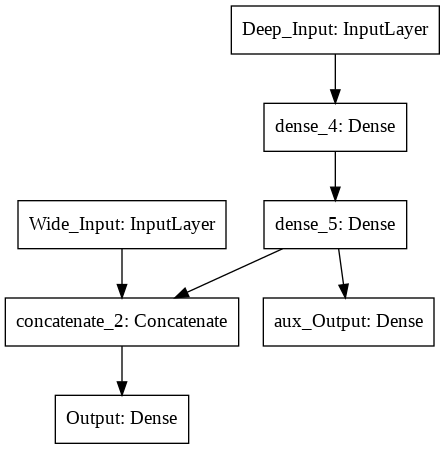

In [7]:
# define inputs
def get_base_model():
  input_a = Input(shape=[1], name="Wide_Input")
  input_b = Input(shape=[1], name="Deep_Input")

  # define deep path
  hidden_1 = Dense(30, activation="relu")(input_b)
  hidden_2 = Dense(30, activation="relu")(hidden_1)

  # define merged path
  concat = concatenate([input_a, hidden_2])
  output = Dense(1, name="Output")(concat)

  # define another output for the deep path
  aux_output = Dense(1,name="aux_Output")(hidden_2)

  # build the model
  model = Model(inputs=[input_a, input_b], outputs=[output, aux_output])
  return model

# visualize the architecture
model = get_base_model()
plot_model(model)


Implement as a Class

Alternatively, you can also implement this same model as a class
* For that, you define a class that inherits from the Model class
* Inheriting from the existing Model class lets you use the Model methods such as compile(), fit(), evaluate().

When inheriting from Model, you will want to define at least two functions:
* __init__(): you will initialize the instance attributes.
* call(): you will build the network and return the output layers.

If you compare the two methods, the structure is very similar, except when using the class, you'll define all the layers in one function, init, and connect the layers together in another function, call.


In [8]:
class WideAndDeepModel(Model):

  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    '''defines the network layers'''
    self.hidden1 = Dense(units=units, activation=activation)
    self.hidden2 = Dense(units=units, activation=activation)
    self.main_output = Dense(units=1)
    self.aux_output = Dense(units=1)

  def call(self, inputs):
    '''defines the network architecture'''
    wide_input, deep_input = inputs
    hidden1 = self.hidden1(deep_input)
    hidden2 = self.hidden2(x)
    concat = concatenate([wide_input, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

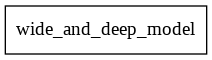

In [9]:
model = WideAndDeepModel()
plot_model(model) 
# the model details encapsulated inside the Model class